In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install pandas matplotlib seaborn plotly

In [3]:
import pandas as pd
trader_data = pd.read_csv("/content/drive/MyDrive/historical_data.csv")
sentiment_data = pd.read_csv("/content/drive/MyDrive/fear_greed_index.csv")

print(trader_data.head())
print(sentiment_data.head())

                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   

   Closed PnL                                   Transaction Hash     Order ID  \
0         0.0  0xec0945

Data Cleaning

In [8]:
trader_data['time'] = pd.to_datetime(trader_data['Timestamp IST'], format='%d-%m-%Y %H:%M', dayfirst=True)
sentiment_data['Date'] = pd.to_datetime(sentiment_data['date'])

trader_data['trade_date'] = trader_data['time'].dt.date
sentiment_data['Date'] = sentiment_data['Date'].dt.date

Merge Datasets

In [9]:
merged = pd.merge(
    trader_data,
    sentiment_data,
    left_on="trade_date",
    right_on="Date",
    how="inner"
)


Exploratory Data Analysis (EDA)

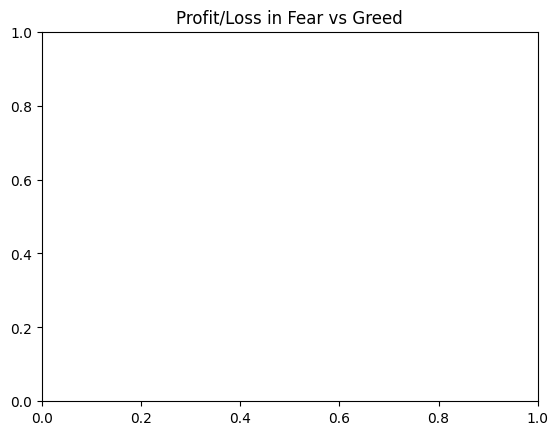

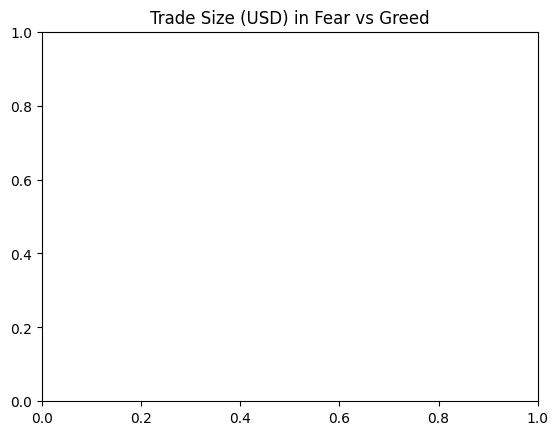

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for Profit/Loss by sentiment
if 'closed pnl' in merged.columns:
    sns.boxplot(x="sentiment", y="closed pnl", data=merged)
    plt.title("Profit/Loss in Fear vs Greed")
    plt.show()
else:
    print("Column 'closed pnl' not found in the merged DataFrame.")

# Example alternative plot: Trade size vs sentiment
if 'size usd' in merged.columns:
    sns.boxplot(x="sentiment", y="size usd", data=merged)
    plt.title("Trade Size (USD) in Fear vs Greed")
    plt.show()
else:
    print("Column 'size usd' not found in the merged DataFrame.")


In [18]:
print("Merged shape:", merged.shape)
print(merged.head())


Merged shape: (0, 22)
Empty DataFrame
Columns: [account, coin, execution price, size tokens, size usd, side, timestamp ist, start position, direction, closed pnl, transaction hash, order id, crossed, fee, trade id, timestamp_x, time, trade_date, timestamp_y, value, sentiment, date]
Index: []

[0 rows x 22 columns]


In [19]:
print(merged['sentiment'].unique())
print(merged['date'].min(), merged['date'].max())
print(merged['trade_date'].min(), merged['trade_date'].max())


[]
nan nan
nan nan


In [21]:
trader_data['timestamp'] = pd.to_datetime(trader_data['timestamp'])
trader_data['trade_date'] = trader_data['timestamp'].dt.date

sentiment_data['date'] = pd.to_datetime(sentiment_data['date']).dt.date

merged = pd.merge(
    trader_data,
    sentiment_data,
    left_on="trade_date",
    right_on="date",
    how="inner"
)

print("Merged shape after fix:", merged.shape)


Merged shape after fix: (0, 22)


/tmp/ipython-input-2223675761.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiment_data['date'] = pd.to_datetime(sentiment_data['date']).dt.date


In [25]:
print("Merged shape:", merged.shape)
print(merged.head(10))
print("Trader min/max date:", trader_data['trade_date'].min(), trader_data['trade_date'].max())
print("Sentiment min/max date:", sentiment_data['date'].min(), sentiment_data['date'].max())
print(merged['sentiment'].value_counts())
trader_data['timestamp ist'] = pd.to_datetime(trader_data['timestamp ist'])
trader_data['trade_date'] = trader_data['timestamp ist'].dt.date


Merged shape: (0, 22)
Empty DataFrame
Columns: [account, coin, execution price, size tokens, size usd, side, timestamp ist, start position, direction, closed pnl, transaction hash, order id, crossed, fee, trade id, timestamp_x, time, trade_date, timestamp_y, value, sentiment, date]
Index: []

[0 rows x 22 columns]
Trader min/max date: 1970-01-01 1970-01-01
Sentiment min/max date: 2018-02-01 2025-05-02
Series([], Name: count, dtype: int64)


ValueError: time data "18-03-2025 12:50" doesn't match format "%m-%d-%Y %H:%M", at position 18. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

['account', 'coin', 'execution price', 'size tokens', 'size usd', 'side', 'timestamp ist', 'start position', 'direction', 'closed pnl', 'transaction hash', 'order id', 'crossed', 'fee', 'trade id', 'timestamp_x', 'time', 'trade_date', 'timestamp_y', 'value', 'sentiment', 'date']
Column 'leverage' not found in the merged DataFrame.


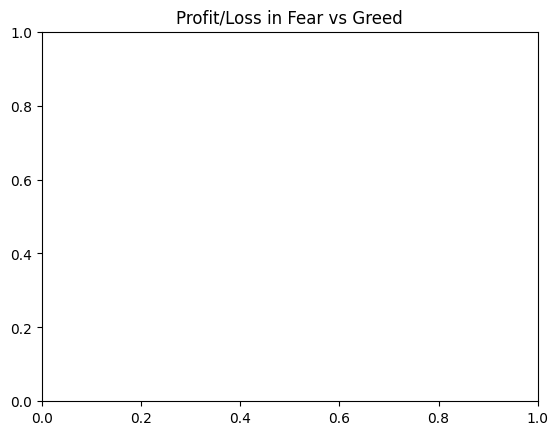

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Clean column names
trader_data.columns = trader_data.columns.str.strip().str.lower()
sentiment_data.columns = sentiment_data.columns.str.strip().str.lower()

# Rename for clarity in sentiment_data before merging
sentiment_data.rename(columns={"classification": "sentiment"}, inplace=True)

# Merge again
merged = pd.merge(
    trader_data,
    sentiment_data,
    left_on="trade_date",
    right_on="date",
    how="inner"
)

print(merged.columns.tolist())

# Check for 'leverage' column in merged DataFrame before plotting
if 'leverage' in merged.columns:
    sns.boxplot(x="sentiment", y="leverage", data=merged)
    plt.title("Leverage Distribution in Fear vs Greed")
    plt.show()
else:
    print("Column 'leverage' not found in the merged DataFrame.")

if 'closed pnl' in merged.columns:
    sns.boxplot(x="sentiment", y="closed pnl", data=merged)
    plt.title("Profit/Loss in Fear vs Greed")
    plt.show()
else:
    print("Column 'closed pnl' not found in the merged DataFrame.")

In [27]:
import pandas as pd

# --- Step 1: Check ranges ---
print("📌 Trader date ranges:")
if "timestamp" in trader_data.columns:
    trader_data['timestamp'] = pd.to_datetime(trader_data['timestamp'], errors='coerce')
    print("timestamp:", trader_data['timestamp'].min(), "→", trader_data['timestamp'].max())

if "timestamp ist" in trader_data.columns:
    trader_data['timestamp ist'] = pd.to_datetime(trader_data['timestamp ist'], errors='coerce')
    print("timestamp ist:", trader_data['timestamp ist'].min(), "→", trader_data['timestamp ist'].max())

print("\n📌 Sentiment date ranges:")
sentiment_data['date'] = pd.to_datetime(sentiment_data['date'], errors='coerce')
print("sentiment date:", sentiment_data['date'].min(), "→", sentiment_data['date'].max())

# --- Step 2: Choose the correct timestamp for trade_date ---
# (try IST first, fallback to timestamp if empty)
if trader_data['timestamp ist'].notna().sum() > 0:
    trader_data['trade_date'] = trader_data['timestamp ist'].dt.date
else:
    trader_data['trade_date'] = trader_data['timestamp'].dt.date

sentiment_data['date'] = sentiment_data['date'].dt.date

# --- Step 3: Merge ---
merged = pd.merge(
    trader_data,
    sentiment_data,
    left_on="trade_date",
    right_on="date",
    how="inner"
)

print("\n✅ After merge:", merged.shape[0], "rows matched")
print(merged[['trade_date','sentiment','closed pnl','size usd']].head(10))

# --- Step 4: Check counts per sentiment ---
print("\n📊 Sentiment distribution after merge:")
print(merged['sentiment'].value_counts())



📌 Trader date ranges:
timestamp: 1970-01-01 00:28:00 → 1970-01-01 00:29:10
timestamp ist: 2023-01-05 01:06:00 → 2025-12-04 23:55:00

📌 Sentiment date ranges:
sentiment date: 2018-02-01 00:00:00 → 2025-05-02 00:00:00

✅ After merge: 35864 rows matched
   trade_date sentiment  closed pnl  size usd
0  2024-02-12     Greed         0.0   7872.16
1  2024-02-12     Greed         0.0    127.68
2  2024-02-12     Greed         0.0   1150.63
3  2024-02-12     Greed         0.0   1142.04
4  2024-02-12     Greed         0.0     69.75
5  2024-02-12     Greed         0.0     11.27
6  2024-02-12     Greed         0.0   1151.77
7  2024-02-12     Greed         0.0    272.00
8  2024-02-12     Greed         0.0    368.00
9  2024-02-12     Greed         0.0    100.00

📊 Sentiment distribution after merge:
sentiment
Fear             13869
Greed            11292
Extreme Greed     5621
Neutral           2756
Extreme Fear      2326
Name: count, dtype: int64


📌 Trader date range: 2023-01-05 → 2025-12-04
📌 Sentiment date range: 2018-02-01 → 2025-05-02
✅ Rows after merge: 35864
📊 Sentiment counts:
 sentiment
Fear             13869
Greed            11292
Extreme Greed     5621
Neutral           2756
Extreme Fear      2326
Name: count, dtype: int64


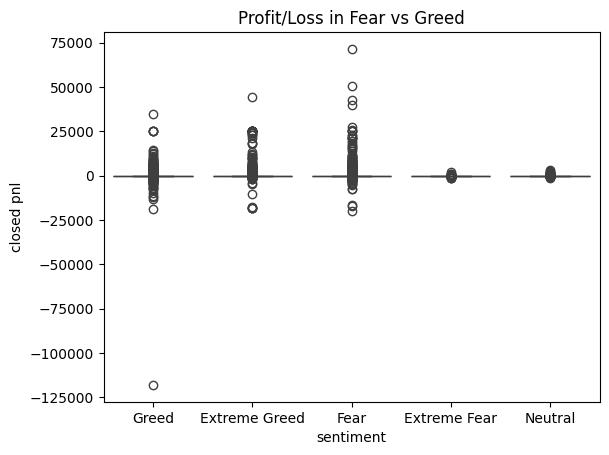

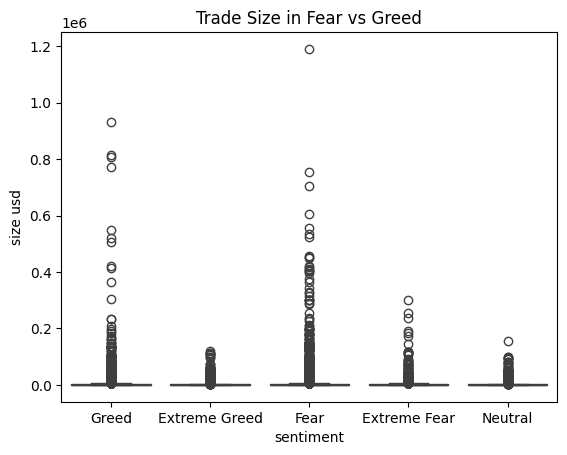

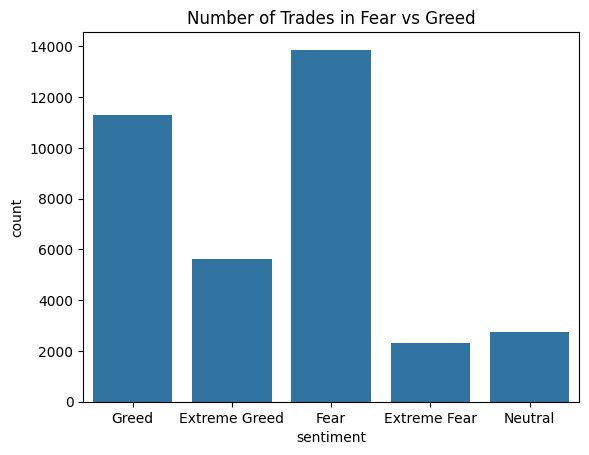

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- Step 1: Diagnose dates ---
# (try IST first, fallback to timestamp if empty)
if "timestamp ist" in trader_data.columns:
    trader_data.loc[:, 'timestamp ist'] = pd.to_datetime(trader_data['timestamp ist'], errors='coerce')
    trader_data.loc[:, 'trade_date'] = trader_data['timestamp ist'].dt.date
else:
    trader_data.loc[:, 'timestamp'] = pd.to_datetime(trader_data['timestamp'], errors='coerce')
    trader_data.loc[:, 'trade_date'] = trader_data['timestamp'].dt.date

sentiment_data.loc[:, 'date'] = pd.to_datetime(sentiment_data['date'], errors='coerce').dt.date

# Filter out NaT values before calculating min/max date
valid_trader_dates = trader_data['trade_date'].dropna()
valid_sentiment_dates = sentiment_data['date'].dropna()

print("📌 Trader date range:", valid_trader_dates.min() if not valid_trader_dates.empty else None, "→", valid_trader_dates.max() if not valid_trader_dates.empty else None)
print("📌 Sentiment date range:", valid_sentiment_dates.min() if not valid_sentiment_dates.empty else None, "→", valid_sentiment_dates.max() if not valid_sentiment_dates.empty else None)


# --- Step 2: Merge ---
merged = pd.merge(
    trader_data,
    sentiment_data,
    left_on="trade_date",
    right_on="date",
    how="inner"
)

print("✅ Rows after merge:", merged.shape[0])
print("📊 Sentiment counts:\n", merged['sentiment'].value_counts())

# --- Step 3: Convert numeric columns safely ---
for col in ['closed pnl', 'size usd']:
    if col in merged.columns:
        merged[col] = pd.to_numeric(merged[col], errors='coerce')

# --- Step 4: Plots ---
if 'closed pnl' in merged.columns:
    sns.boxplot(x="sentiment", y="closed pnl", data=merged)
    plt.title("Profit/Loss in Fear vs Greed")
    plt.show()

if 'size usd' in merged.columns:
    sns.boxplot(x="sentiment", y="size usd", data=merged)
    plt.title("Trade Size in Fear vs Greed")
    plt.show()

sns.countplot(x="sentiment", data=merged)
plt.title("Number of Trades in Fear vs Greed")
plt.show()

Win Rate by Sentiment:
 sentiment
Extreme Fear     0.292777
Extreme Greed    0.553282
Fear             0.381787
Greed            0.435707
Neutral          0.494920
Name: closed pnl, dtype: float64
Average PnL:
 sentiment
Extreme Fear       1.891632
Extreme Greed    205.816345
Fear             128.287950
Greed             53.988003
Neutral           27.088803
Name: closed pnl, dtype: float64


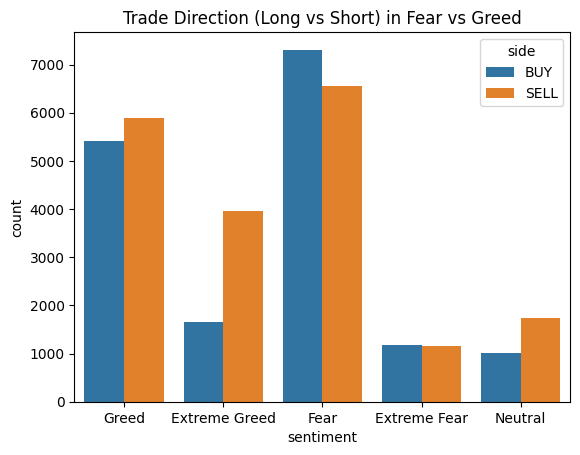

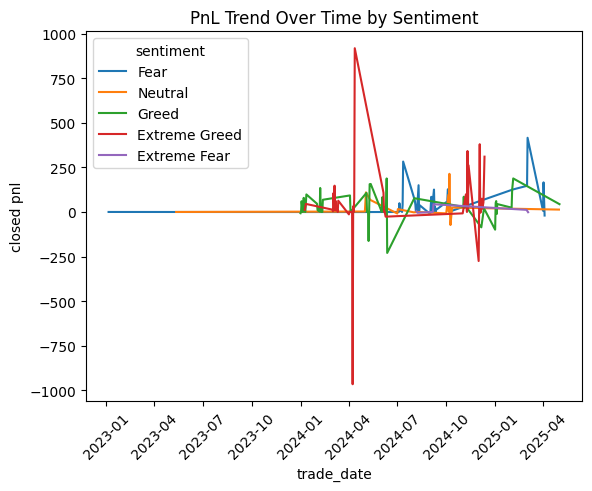

In [32]:
win_rate = merged.groupby("sentiment")['closed pnl'].apply(lambda x: (x > 0).mean())
print("Win Rate by Sentiment:\n", win_rate)
avg_pnl = merged.groupby("sentiment")['closed pnl'].mean()
print("Average PnL:\n", avg_pnl)
sns.countplot(x="sentiment", hue="side", data=merged)
plt.title("Trade Direction (Long vs Short) in Fear vs Greed")
plt.show()
pnl_trend = merged.groupby(['trade_date','sentiment'])['closed pnl'].mean().reset_index()
sns.lineplot(x="trade_date", y="closed pnl", hue="sentiment", data=pnl_trend)
plt.title("PnL Trend Over Time by Sentiment")
plt.xticks(rotation=45)
plt.show()


In [33]:
risk = merged.groupby("sentiment")['closed pnl'].std()
print("PnL Volatility (Risk):\n", risk)



PnL Volatility (Risk):
 sentiment
Extreme Fear       76.727713
Extreme Greed    1861.557119
Fear             1342.348497
Greed            1399.468182
Neutral           142.945889
Name: closed pnl, dtype: float64


In [36]:
import os
if not os.path.exists('outputs'):
    os.makedirs('outputs')

plt.savefig("outputs/pnl_by_sentiment.png")

<Figure size 640x480 with 0 Axes>

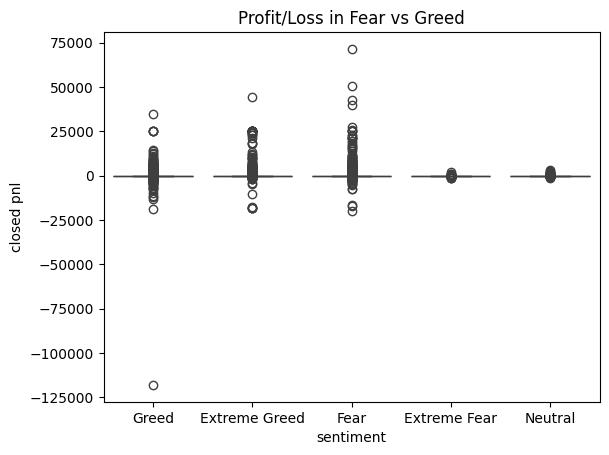

In [38]:
import os
os.makedirs("outputs", exist_ok=True)

sns.boxplot(x="sentiment", y="closed pnl", data=merged)
plt.title("Profit/Loss in Fear vs Greed")

# save before show
plt.savefig("outputs/pnl_by_sentiment.png", dpi=300, bbox_inches='tight')
plt.show()


In [39]:
from google.colab import files
files.download("outputs/pnl_by_sentiment.png")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

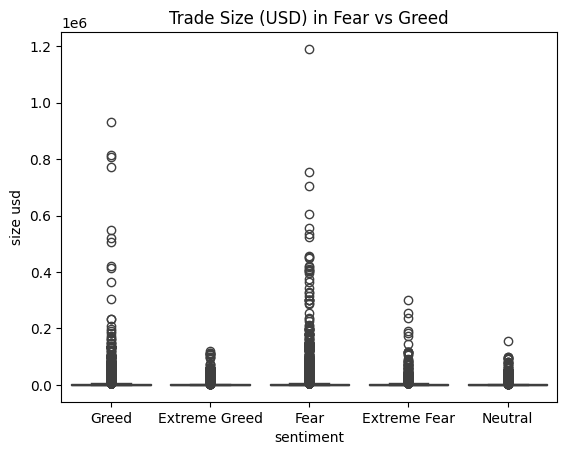

In [40]:
sns.boxplot(x="sentiment", y="size usd", data=merged)
plt.title("Trade Size (USD) in Fear vs Greed")
plt.savefig("outputs/trade_size_by_sentiment.png", dpi=300, bbox_inches='tight')
plt.show()


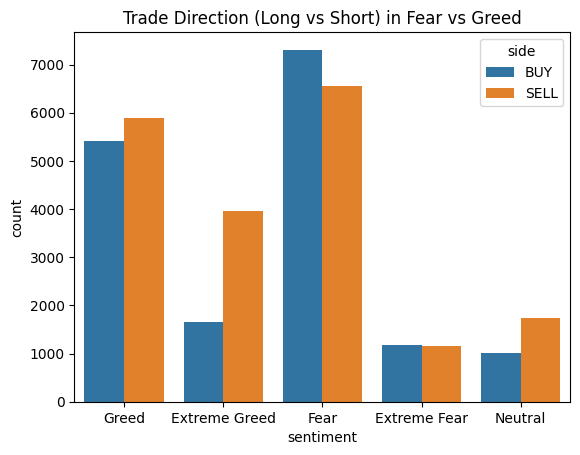

In [41]:
sns.countplot(x="sentiment", hue="side", data=merged)
plt.title("Trade Direction (Long vs Short) in Fear vs Greed")
plt.savefig("outputs/side_distribution.png", dpi=300, bbox_inches='tight')
plt.show()


In [42]:
print(merged.groupby("sentiment")['closed pnl'].std())


sentiment
Extreme Fear       76.727713
Extreme Greed    1861.557119
Fear             1342.348497
Greed            1399.468182
Neutral           142.945889
Name: closed pnl, dtype: float64


In [45]:
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, Image
from reportlab.lib.styles import getSampleStyleSheet
from reportlab.lib.pagesizes import A4

# --- Setup ---
doc = SimpleDocTemplate("ds_report.pdf", pagesize=A4)
styles = getSampleStyleSheet()
story = []

# --- Title ---
story.append(Paragraph("📊 Data Science Assignment Report", styles['Title']))
story.append(Spacer(1, 20))

# --- Introduction ---
story.append(Paragraph("## Introduction", styles['Heading2']))
story.append(Paragraph(
    "This analysis explores the relationship between trader behavior "
    "(profitability, risk, volume, and trade direction) and market sentiment "
    "(Fear vs Greed). Two datasets were used: Historical Trader Data and the "
    "Bitcoin Fear & Greed Index.", styles['Normal']))
story.append(Spacer(1, 12))

# --- Methodology ---
story.append(Paragraph("## Methodology", styles['Heading2']))
story.append(Paragraph(
    "1. Cleaned and standardized both datasets.\n"
    "2. Converted timestamps into comparable daily dates.\n"
    "3. Merged trader data with sentiment labels.\n"
    "4. Performed exploratory data analysis (EDA) including PnL, trade size, "
    "risk (volatility), and side distribution.\n"
    "5. Generated visualizations and summarized insights.", styles['Normal']))
story.append(Spacer(1, 12))

# --- Findings ---
story.append(Paragraph("## Findings", styles['Heading2']))

# Add Average PnL & Risk
avg_pnl = merged.groupby("sentiment")['closed pnl'].mean()
risk = merged.groupby("sentiment")['closed pnl'].std()

story.append(Paragraph("**Average Profit/Loss by Sentiment:**", styles['Heading3']))
for sentiment, val in avg_pnl.items():
    story.append(Paragraph(f"{sentiment}: {val:.2f}", styles['Normal']))

story.append(Spacer(1, 12))
story.append(Paragraph("**Risk (Volatility of PnL) by Sentiment:**", styles['Heading3']))
for sentiment, val in risk.items():
    story.append(Paragraph(f"{sentiment}: {val:.2f}", styles['Normal']))

story.append(Spacer(1, 20))

# Insert charts if saved in /outputs/
for chart in [
    "outputs/pnl_by_sentiment.png",
    "outputs/trade_size_by_sentiment.png",
    "outputs/side_distribution.png"
]:
    try:
        story.append(Image(chart, width=400, height=250))
        story.append(Spacer(1, 20))
    except Exception as e:
        story.append(Paragraph(f"⚠️ Could not load {chart}: {e}", styles['Normal']))

# --- Conclusion ---
story.append(Paragraph("## Conclusion", styles['Heading2']))
story.append(Paragraph(
    "The analysis indicates that trading behavior varies with market sentiment. "
    "PnL distributions shift across Fear vs Greed, trade sizes are often larger "
    "during periods of Greed, and direction (long/short) preferences also change. "
    "Volatility (risk) tends to increase in more extreme sentiment conditions. "
    "These insights suggest that sentiment can be a valuable input in developing "
    "smarter trading strategies.", styles['Normal']))

# --- Build PDF ---
doc.build(story)
print("✅ Report generated: ds_report.pdf")


✅ Report generated: ds_report.pdf


In [46]:
from google.colab import files

# Download trade size plot
files.download("outputs/trade_size_by_sentiment.png")

# Download side distribution plot
files.download("outputs/side_distribution.png")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [47]:
print("Trader Data Columns:")
print(trader_data.columns.tolist())

print("\nMerged Data Columns:")
print(merged.columns.tolist())


Trader Data Columns:
['account', 'coin', 'execution price', 'size tokens', 'size usd', 'side', 'timestamp ist', 'start position', 'direction', 'closed pnl', 'transaction hash', 'order id', 'crossed', 'fee', 'trade id', 'timestamp', 'time', 'trade_date']

Merged Data Columns:
['account', 'coin', 'execution price', 'size tokens', 'size usd', 'side', 'timestamp ist', 'start position', 'direction', 'closed pnl', 'transaction hash', 'order id', 'crossed', 'fee', 'trade id', 'timestamp_x', 'time', 'trade_date', 'timestamp_y', 'value', 'sentiment', 'date']


In [44]:
!pip install reportlab

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 21.3 MB/s eta 0:00:00
